In [1]:
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

In [2]:
sn = rio.open('/data/spacenet/bldg/data/pytorch-PAN-valid/images/PAN_AOI_2_Vegas_img1006.tif')

In [3]:
sn.transform

Affine(2.699999999982503e-06, 0.0, -115.2794376,
       0.0, -2.699999999993434e-06, 36.1879676998)

In [4]:
dg = rio.open('McKellar_R1C1.tif')

In [5]:
dg.transform

Affine(4.5000000050022896e-06, 0.0, -79.0629494190216,
       0.0, -4.499999998998559e-06, 35.16010062443332)

In [6]:
scale_fac = sn.transform[0] / dg.transform[0]
before_shape = np.array(dg.read(1).shape)
after_shape = np.array(before_shape * scale_fac, dtype = 'uint16')

In [7]:
before_shape

array([1120, 2713])

In [8]:
after_shape

array([ 671, 1627], dtype=uint16)

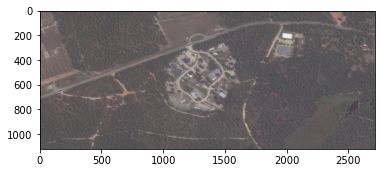

In [10]:
dg_img = dg.read((1,2,3)).transpose(1,2,0)
plt.imshow(dg_img)

In [20]:
dg_res = np.array(resize(dg_img, after_shape), dtype=np.float32)

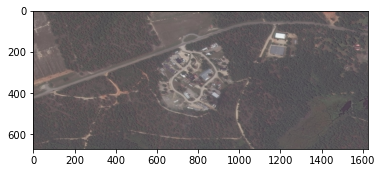

In [21]:
plt.imshow(dg_res)

In [22]:
from skimage.io import imsave

In [23]:
imsave('McKellar_res.tif', dg_res*255)